<a href="https://colab.research.google.com/github/Buzzrightear/CO885_dissertation/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Univariate MLP

In [91]:
# Mostly taken from https://mc.ai/an-introduction-on-time-series-forecasting-with-simple-neura-networks-lstm/
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

In [87]:
# Dataset

df = pd.read_csv('https://raw.githubusercontent.com/Buzzrightear/CO885_dissertation/master/wind_data_3.csv', parse_dates=['Date time']) #Read in csv to dataframe
df=df[['Date time','Power avg']].dropna()


df['Date time'] = pd.to_datetime(df['Date time'])
ind_df = df.set_index(['Date time'], drop=True)
ind_df.head()


,Power avg
Date time,
2011-09-01 00:10:00,78.0
2011-09-01 00:20:00,77.0
2011-09-01 00:30:00,72.0
2011-09-01 00:40:00,70.0
2011-09-01 00:50:00,62.0


0    78.0
1    77.0
2    72.0
3    70.0
4    62.0
Name: Power avg, dtype: float64
Epoch 1/4
170739/170739 [==============================] - 127s 745us/step - loss: 2210.6746
Epoch 2/4
170739/170739 [==============================] - 133s 781us/step - loss: 2200.4011
Epoch 3/4
170739/170739 [==============================] - 128s 750us/step - loss: 2199.9551
Epoch 4/4
170739/170739 [==============================] - 126s 741us/step - loss: 2199.4749
The R2 score on the Train set is:	0.928
The R2 score on the Test set is:	0.915


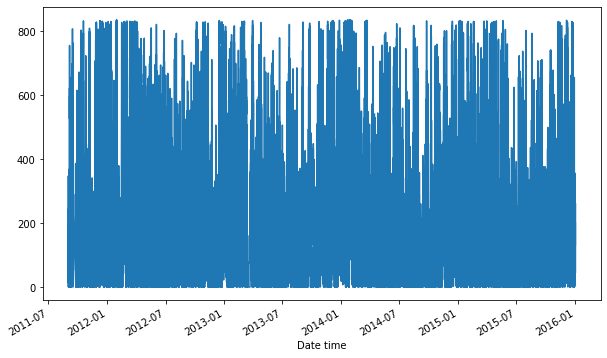

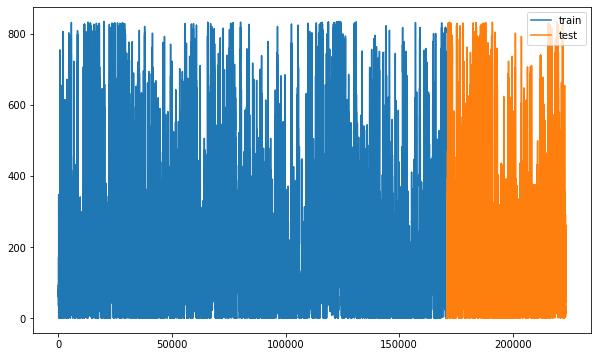

In [89]:
ind_df = ind_df.sort_index()
plt.figure(figsize=(10, 6))
ind_df['Power avg'].plot()

#split_date = pd.Timestamp('2014-01-01')
#train = df.loc[:split_date]
#test = df.loc[split_date:]

#scaler = MinMaxScaler()
#df = scaler.fit_transform(df)
#test_sc = scaler.transform(test)


train = df.head(df.shape[0]-365*144)
test = df.tail(365*144)

train =  train['Power avg']
test =  test['Power avg']

plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

print(train.head())

train = train.to_numpy()
test = test.to_numpy()

train.reshape(1, -1)




X_train = train[:-1]
y_train = train[1:]

X_test = test[:-1]
y_test = test[1:]

nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)


In [92]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

print("The MAE score on the Train set is:\t{:0.3f}".format(mean_absolute_error(y_train, y_train_pred_nn)))
print("The MAE score on the Test set is:\t{:0.3f}".format(mean_absolute_error(y_test, y_pred_test_nn)))


print("The MSE score on the Train set is:\t{:0.3f}".format(mean_squared_error(y_train, y_train_pred_nn)))
print("The MSE score on the Test set is:\t{:0.3f}".format(mean_squared_error(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.928
The R2 score on the Test set is:	0.915
The MAE score on the Train set is:	28.961
The MAE score on the Test set is:	30.228
The MSE score on the Train set is:	2407.275
The MSE score on the Test set is:	2692.727
